In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs , make_moons


In [71]:
# X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=1)
X,Y=make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=1)
print(X.shape,Y.shape)

(1000, 2) (1000,)


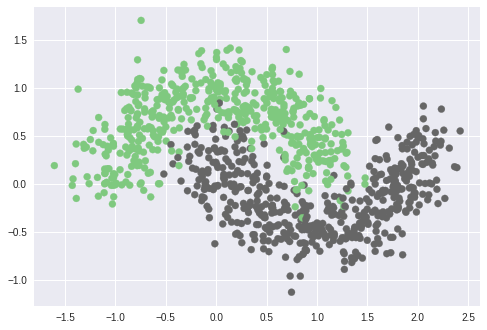

In [72]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [73]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))


In [74]:
def predict(X,weights):
    z = np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions

def loss(X,Y,weights):
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost
    
def update(X,Y,weights,learning_rate):
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y)
    m=X.shape[0]
    weights=weights-learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=100):
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    weights=np.zeros(X.shape[1])
    for epoch in range(maxEpochs):
        weights=update(X,Y,weights,learning_rate)
        if epoch%100==0:
            l=loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    
    return weights
    

In [75]:
weights=train(X,Y,maxEpochs=1000)

Epoch 0 Loss 0.6481
Epoch 100 Loss 0.3166
Epoch 200 Loss 0.3004
Epoch 300 Loss 0.2960
Epoch 400 Loss 0.2946
Epoch 500 Loss 0.2940
Epoch 600 Loss 0.2938
Epoch 700 Loss 0.2937
Epoch 800 Loss 0.2936
Epoch 900 Loss 0.2936


In [76]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones=np.ones((X_Test.shape[0],1))
        X_Test=np.hstack((ones,X_Test))
    probs=predict(X_Test,weights)
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels
    
    

In [80]:
x1=np.linspace(-2,4,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]



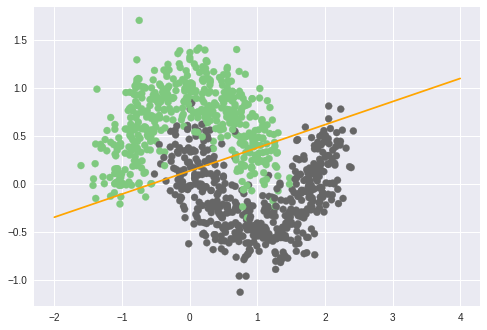

In [81]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='orange')
plt.show()

In [82]:
Y_=getPredictions(X,weights,labels=True)

training_acc=np.sum(Y_==Y)/Y.shape[0]

print(training_acc)

0.869
